In [16]:
genome_dir="/Users/jmb/Desktop/ViralFate/Annotation/genomes"

pb_genomes=open("./data/K2.151228_PacBio_Nahant_Phages.txt").readlines()
pbg=[i.replace("\r\n","") for i in pb_genomes]


#get total length of genomes submitted to pacbio based on preliminary genome assemblies:
#output text file with phage and genome length on each line
from pyfaidx import Fasta

total_len=0
genome_lens=open("./data/igenome_lengths.txt","w")
genome_lens.write("phage\tgenome_len\n")


for g in pbg:
    f=Fasta("%s/%sfinal.fasta"% (genome_dir, g))
    length=len(str(f[0]))
    genome_lens.write("%s\t%s\n" % (g, length))
    total_len+=length
genome_lens.close()
print "the combined length of all sequenced genomes is %s" % total_len

the combined length of all sequenced genomes is 4636042


In [12]:
#calculate read lengths for pac bio read files:

import glob
out=open("./data/read_lengths.txt","w")
out.write("fasta_file\tseq_id\tread_len\n")
readfiles=glob.glob("./data/*fasta")

for r in readfiles:
    f=Fasta(r)
    for i in f.keys():
        length=len(str(f[i]))
        fasta=r.split("/")[-1]
        sequence=i
        out.write("%s\t%s\t%s\n" % (fasta, sequence, length))
out.close()

In [1]:
%load_ext rpy2.ipython
%R library(dplyr); library(ggplot2);library(magrittr)

//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)


array(['magrittr', 'ggplot2', 'dplyr', 'tools', 'stats', 'graphics',
       'grDevices', 'utils', 'datasets', 'methods', 'base'], 
      dtype='|S9')

In [36]:
%%R -i total_len
read_info<-read.table("./data/read_lengths.txt", sep="\t",header=TRUE)
head(read_info)

                                                                      fasta_file
1 m151222_131515_42146_c100942972550000001823215506101634_s1_p0.1.subreads.fasta
2 m151222_131515_42146_c100942972550000001823215506101634_s1_p0.1.subreads.fasta
3 m151222_131515_42146_c100942972550000001823215506101634_s1_p0.1.subreads.fasta
4 m151222_131515_42146_c100942972550000001823215506101634_s1_p0.1.subreads.fasta
5 m151222_131515_42146_c100942972550000001823215506101634_s1_p0.1.subreads.fasta
6 m151222_131515_42146_c100942972550000001823215506101634_s1_p0.1.subreads.fasta
                                                                         seq_id
1       m151222_131515_42146_c100942972550000001823215506101634_s1_p0/80/0_2279
2       m151222_131515_42146_c100942972550000001823215506101634_s1_p0/100/0_961
3  m151222_131515_42146_c100942972550000001823215506101634_s1_p0/103/7653_12991
4 m151222_131515_42146_c100942972550000001823215506101634_s1_p0/103/13032_22378
5     m151222_131515_42146_c10094

In [55]:
%%R
print(nrow(read_info))
total_bp=sum(read_info$read_len)

[1] 147940


In [37]:
%%R
coverage=total_bp/total_len
coverage

[1] 185.0119


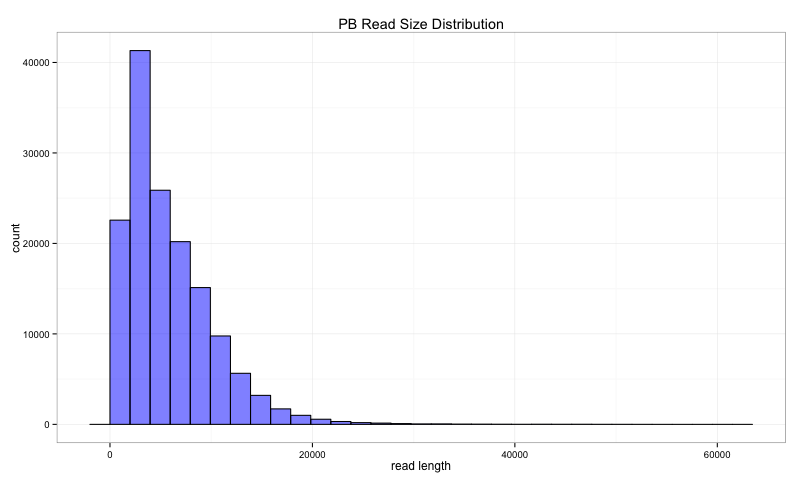

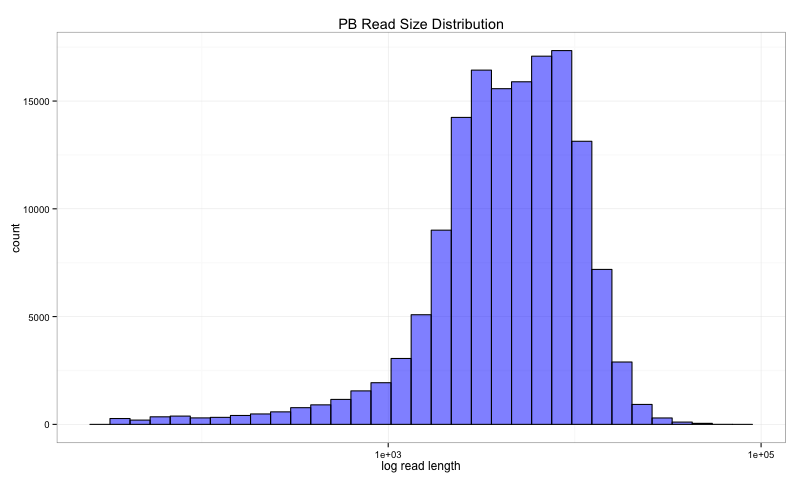

In [34]:
%%R -w 800
p=ggplot(read_info, aes(read_len))+geom_bar(fill="blue",alpha=0.5,col="black")+theme_bw()
plog=ggplot(read_info, aes(read_len))+geom_bar(fill="blue",alpha=0.5,col="black")+theme_bw()+scale_x_log10()

plot(p+labs(x="read length", title="PB Read Size Distribution"))
plot(plog+labs(x="log read length", title="PB Read Size Distribution"))

In [48]:
%%R
ri1<-read_info[order(-read_info$read_len),]
cov_thresh<-total_len*100
print(cov_thresh)

total=vector()

length(ri1$read_len)
rls=ri1$read_len

[1] 463604200


In [54]:
%%R
for (i in seq(1,length(ri1$read_len))){
    vec=rls[0:i]
    number=sum(vec)
    total=c(total, number)
    if (number>cov_thresh){
        print(paste("number of reads to use is:", i, sep=" "))
        print(paste("the threshold length is",rls[i], sep=" "))
        break
}}

[1] "number of reads to use is: 40292"
[1] "the threshold length is 7696"


In [77]:
genome_dir="/Users/jmb/Desktop/ViralFate/Annotation/genomes"

pb_genomes=open("./data/K2.151228_PacBio_Nahant_Phages.txt").readlines()
pbg=[i.replace("\r\n","") for i in pb_genomes]


#get total length of genomes submitted to pacbio based on preliminary genome assemblies:
from pyfaidx import Fasta

combined=open("./data/pbsub_illumina_genomes.fasta","w")

for g in pbg:
    f=Fasta("%s/%sfinal.fasta"% (genome_dir, g))
    combined.write(">%s\n%s\n" % (f[0].name, f[0]))
combined.close()

concat=open("./data/pbsub_igenomes_concat.fasta","w")
for g in pbg:
    f=Fasta("%s/%sfinal.fasta"% (genome_dir, g))
    concat.write(">%s\n%s%s\n" % (f[0].name, f[0],f[0]))
concat.close()

In [47]:
asm1=Fasta("./data/asm.ctg.fasta") 

asm1_lens=""
asm1_lens+="asm1_ctg\tasm1_ctg_len\n"

for s in asm1.keys():
    length=len(str(asm1[s]))
    asm1_lens+="%s\t%s\n" % (s, length)

In [57]:
%%R
blast<-read.table("./data/pb_asm1_vs_igenomes.txt", sep="\t")

In [74]:
%Rpull blast
blast['phageshort']=[i.split("_")[1] for i in blast['V2']]

pandas.core.frame.DataFrame

In [64]:
%%R -i blast
top_hits<-merge(aggregate(V6 ~ V1, data=blast, max), blast, all.x=T)
hpi<-filter(blast, V3>99, V4>1000)
hpi%>%group_by(V1, phageshort)%>%
    summarise(num_bmach=n(),total_aln=sum(V4))->hpi

In [63]:
%%R -i asm1_lens 

bs<-top_hits[,c(1,13,4,5)] #blast summary
colnames(bs)<-c("asm1_ctg","igenome","pct_id","aln_len")
head(bs)

igenome<-read.table("./data/igenome_lengths.txt", sep="\t",header=TRUE)
head(igenome)

bs$igenome_len<-igenome$genome_len[match(bs$igenome, igenome$phage)]
head(bs)

asm1_lens%>%textConnection%>%read.table(sep="\t", header=TRUE)->al
bs$asm1_ctg_len<-al$asm1_ctg_len[match(bs$asm1_ctg, al$asm1_ctg)]
bs

           asm1_ctg  igenome pct_id aln_len igenome_len asm1_ctg_len
1  ctg7180000000086 1.121.O.  99.90  137084      145590       154600
2  ctg7180000000087 1.161.O.  99.27   17260      140668       157893
3  ctg7180000000088 1.063.O.  99.89  124636      128641       140348
4  ctg7180000000089 1.170.O.  99.91   61784      133692       142305
5  ctg7180000000089 1.170.O.  99.93   80634      133692       142305
6  ctg7180000000090 1.193.O.  99.91  105734      132560       142558
7  ctg7180000000091 1.084.O.  99.75   38015      141906       154702
8  ctg7180000000092 1.187.O.  99.88  102100      133254       145125
9  ctg7180000000093 1.215.A.  99.82   73782       80834        92993
10 ctg7180000000094 1.042.O.  87.36    5499       49730        56051
11 ctg7180000000095 1.255.O.  99.75   61454      159885       123730
12 ctg7180000000096 1.205.O.  99.54   25973       57861        73428
13 ctg7180000000098 1.007.O.  99.85   34593       49244        61553
14 ctg7180000000099 3.058.O.  99.9

In [66]:
%%R
str(hpi)

Classes ‘grouped_df’, ‘tbl_df’, ‘tbl’ and 'data.frame':	66 obs. of  4 variables:
 $ V1        : Factor w/ 71 levels "ctg7180000000086",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ phageshort: Factor w/ 72 levels "1.007.O.","1.009.O.",..: 18 27 9 29 39 12 35 44 31 53 ...
 $ num_bmach : int  2 3 2 2 2 2 2 2 2 2 ...
 $ total_aln : int [1:6282(1d)] 154774 158098 140510 142418 142721 154869 145274 88837 56239 123914 ...
 - attr(*, "vars")=List of 1
  ..$ : symbol V1
 - attr(*, "drop")= logi TRUE


In [76]:
%%R
bs<-hpi
colnames(bs)<-c("asm1_ctg","igenome","num_blast_match","blast_sum_alnlen")

igenome<-read.table("./data/igenome_lengths.txt", sep="\t",header=TRUE)
head(igenome)

bs$igenome_len<-igenome$genome_len[match(bs$igenome, igenome$phage)]
head(bs)

asm1_lens%>%textConnection%>%read.table(sep="\t", header=TRUE)->al
bs$asm1_ctg_len<-al$asm1_ctg_len[match(bs$asm1_ctg, al$asm1_ctg)]
head(bs)%>%print
write.table(bs, "./data/asm1_blast_comparison_summed_matches.txt", sep="\t",quote=FALSE, row.names=FALSE)

Source: local data frame [6 x 6]

          asm1_ctg  igenome num_blast_match blast_sum_alnlen igenome_len
            (fctr)   (fctr)           (int)         (int[6])       (int)
1 ctg7180000000086 1.121.O.               2           154774      145590
2 ctg7180000000087 1.161.O.               3           158098      140668
3 ctg7180000000088 1.063.O.               2           140510      128641
4 ctg7180000000089 1.170.O.               2           142418      133692
5 ctg7180000000090 1.193.O.               2           142721      132560
6 ctg7180000000091 1.084.O.               2           154869      141906
Variables not shown: asm1_ctg_len (int)


## Checking out KK's HGAP contigs

In [2]:
%%R
blast<-read.table("./data/kkhgap_vs_igenomes.txt", sep="\t")

In [3]:
%Rpull blast
blast['phageshort']=[i.split("_")[1] for i in blast['V2']]

In [4]:
%%R -i blast
#select top hits only:
top_hits<-merge(aggregate(V6 ~ V1, data=blast, max), blast, all.x=T)

#select only hits with >99pct id and an alignment of at least 1000:
hpi<-filter(blast, V3>99, V4>1000)
hpi%>%group_by(V1, phageshort)%>%
    summarise(num_bmach=n(),total_aln=sum(V4))->hpi

In [5]:
from pyfaidx import Fasta
#create text object containing information about pb assembly contig lengths:

kkasm=Fasta("./data/kkHGAP.fasta") 

kk_lens=""
kk_lens+="kk_hgap_ctg\tctg_len\n"

for s in kkasm.keys():
    length=len(str(kkasm[s]))
    kk_lens+="%s\t%s\n" % (s, length)


In [6]:
%%R -i kk_lens 

bs<-top_hits[,c(1,13,4,5)] #blast summary
colnames(bs)<-c("kk_hgap_ctg","igenome","pct_id","aln_len")
head(bs)

igenome<-read.table("./data/igenome_lengths.txt", sep="\t",header=TRUE)
head(igenome)

bs$igenome_len<-igenome$genome_len[match(bs$igenome, igenome$phage)]
head(bs)

kk_lens%>%textConnection%>%read.table(sep="\t", header=TRUE)->al
#al%>%print%>%head

bs$ctg_len<-al$ctg_len[match(bs$kk_hgap_ctg, al$kk_hgap_ctg)]
bs

               kk_hgap_ctg  igenome pct_id aln_len igenome_len ctg_len
1  scf7180000000170|quiver 1.084.O.  72.52    1321      141906  139320
2  scf7180000000171|quiver 1.161.O.  72.48     843      140668  158559
3  scf7180000000172|quiver 1.063.O.  72.52    1321      128641  151795
4  scf7180000000173|quiver 1.193.O.  85.99    3005      132560  153208
5  scf7180000000174|quiver 1.161.O.  77.11    1088      140668  141083
6  scf7180000000175|quiver 1.193.O.  80.37    1584      132560  146858
7  scf7180000000176|quiver 1.187.O.  80.34    1582      133254  145742
8  scf7180000000177|quiver 1.205.O.  99.92   29873       57861   69203
9  scf7180000000178|quiver 1.255.O.  99.99  131400      159885  134034
10 scf7180000000179|quiver 1.215.A.  99.83   52444       80834   97177
11 scf7180000000180|quiver 1.029.O.  78.78    5847       46513   61343
12 scf7180000000181|quiver 1.123.O.  99.78   46075       46071   60384
13 scf7180000000182|quiver 2.130.O.  99.91   28716       75797   88104
14 scf

In [22]:
%%R
bs<-hpi
colnames(bs)<-c("kk_hgap_ctg","igenome","num_blast_match","blast_sum_alnlen")

igenome<-read.table("./data/igenome_lengths.txt", sep="\t",header=TRUE)
head(igenome)

bs$igenome_len<-igenome$genome_len[match(bs$igenome, igenome$phage)]
head(bs)

kk_lens%>%textConnection%>%read.table(sep="\t", header=TRUE)->al
bs$ctg_len<-al$ctg_len[match(bs$kk_hgap_ctg, al$kk_hgap_ctg)]

bs%>%print


Source: local data frame [76 x 6]
Groups: V1 [?]

               kk_hgap_ctg  igenome num_blast_match blast_sum_alnlen
                    (fctr)   (fctr)           (int)        (int[10])
1  scf7180000000170|quiver 1.063.O.               2           139338
2  scf7180000000171|quiver 1.121.O.               2           158590
3  scf7180000000172|quiver 1.084.O.               2           151816
4  scf7180000000173|quiver 1.161.O.               2           152386
5  scf7180000000174|quiver 1.170.O.               2           141114
6  scf7180000000175|quiver 1.187.O.               2           146922
7  scf7180000000176|quiver 1.193.O.               2           145818
8  scf7180000000177|quiver 1.205.O.               3            69165
9  scf7180000000178|quiver 1.255.O.               2           134052
10 scf7180000000179|quiver 1.215.A.               2            97311
..                     ...      ...             ...              ...
Variables not shown: igenome_len (int), ctg_len (int)

In [23]:
%%R
ct<-vector()
for (i in seq(1,nrow(bs))){
    vec<-bs[i,]
    c<-as.numeric(abs(1-(vec[5]+vec[6])/(vec[4]*2))) #absolute value of 1-(illumina genome length+hgap contig length)/(2*sum blast alignment length)
                                                        #score close to zero is good.
    ct<-c(ct, c)
           
}

bs<-cbind(bs, ct)
write.table(bs, "./data/kkhgap_blast_comparison_summed_matches.txt", sep="\t",quote=FALSE, row.names=FALSE)#bs%>%ungroup%>%mutate(match_score=abs(1-(igenome_len+ctg_len)/(blast_sum_alnlen*2)))->bs
#print(bs)

In [24]:
!open ./data/kkhgap_blast_comparison_summed_matches.txt -a textedit

[1] 76


# KKHGAP2 Assembly:

In [3]:
%%R
blast<-read.table("./data/kkhgap2_vs_igenomes.txt", sep="\t")

In [4]:
%Rpull blast
blast['phageshort']=[i.split("_")[1] for i in blast['V2']]

In [5]:
%%R -i blast
#select top hits only:
top_hits<-merge(aggregate(V6 ~ V1, data=blast, max), blast, all.x=T)

#select only hits with >99pct id and an alignment of at least 1000:
hpi<-filter(blast, V3>99, V4>1000)
hpi%>%group_by(V1, phageshort)%>%
    summarise(num_bmach=n(),total_aln=sum(V4))->hpi

In [6]:
from pyfaidx import Fasta
#create text object containing information about pb assembly contig lengths:

kkasm=Fasta("./data/kkhgap_run2.fasta") 

kk_lens=""
kk_lens+="kk_hgap_ctg\tctg_len\n"

for s in kkasm.keys():
    length=len(str(kkasm[s]))
    kk_lens+="%s\t%s\n" % (s, length)


In [13]:
%%R -i kk_lens 

bs<-top_hits[,c(1,13,4,5)] #blast summary
colnames(bs)<-c("kk_hgap_ctg","igenome","pct_id","aln_len")


igenome<-read.table("./data/igenome_lengths.txt", sep="\t",header=TRUE)
igenome%>%print

bs$igenome_len<-igenome$genome_len[match(bs$igenome, igenome$phage)]
head(bs)

kk_lens%>%textConnection%>%read.table(sep="\t", header=TRUE)->al
#al%>%print%>%head

bs$ctg_len<-al$ctg_len[match(bs$kk_hgap_ctg, al$kk_hgap_ctg)]
bs

      phage genome_len
1  1.080.O.      10046
2  1.043.O.      10272
3  1.095.O.      10436
4  1.107.C.      10447
5  1.020.O.      10636
6  1.008.O.      10579
7  1.249.A.      10611
8  1.190.O.      21785
9  1.259.O.      28145
10 2.159.B.      31617
11 1.028.O.      31704
12 1.257.O.      32371
13 1.082.O.      35810
14 1.176.O.      36463
15 1.228.O.      36667
16 1.148.O.      36789
17 1.233.B.      36823
18 1.189.O.      36855
19 1.182.O.      36910
20 1.074.O.      36922
21 1.165.O.      37046
22 1.154.O.      37136
23 1.211.B.      37169
24 1.110.O.      37556
25 1.275.O.      37915
26 1.131.O.      37933
27 1.239.O.      38618
28 1.111.B.      40209
29 1.216.O.      41359
30 12G01.O.      41498
31 1.054.O.      41774
32 1.090.B.      41868
33 1.135.O.      41918
34 1.236.O.      42646
35 1.052.A.      42889
36 1.209.O.      43712
37 1.185.O.      43397
38 1.291.O.      43662
39 1.077.O.      44047
40 1.204.O.      44168
41 1.151.O.      44307
42 1.276.O.      44334
43 1.144.O.

In [8]:
%%R
bs<-hpi
colnames(bs)<-c("kk_hgap_ctg","igenome","num_blast_match","blast_sum_alnlen")

igenome<-read.table("./data/igenome_lengths.txt", sep="\t",header=TRUE)
head(igenome)

bs$igenome_len<-igenome$genome_len[match(bs$igenome, igenome$phage)]
head(bs)

kk_lens%>%textConnection%>%read.table(sep="\t", header=TRUE)->al
bs$ctg_len<-al$ctg_len[match(bs$kk_hgap_ctg, al$kk_hgap_ctg)]

bs%>%print


Source: local data frame [69 x 6]
Groups: V1 [?]

               kk_hgap_ctg  igenome num_blast_match blast_sum_alnlen
                    (fctr)   (fctr)           (int)        (int[10])
1  scf7180000000158|quiver 2.275.O.               9           220512
2  scf7180000000159|quiver 1.121.O.               2           154650
3  scf7180000000160|quiver 1.255.O.               2           169640
4  scf7180000000161|quiver 1.193.O.               2           143142
5  scf7180000000162|quiver 1.161.O.               2           149774
6  scf7180000000163|quiver 1.170.O.               2           141252
7  scf7180000000164|quiver 1.063.O.               2           141334
8  scf7180000000165|quiver 1.084.O.               1           141906
9  scf7180000000166|quiver 1.187.O.               2           141662
10 scf7180000000167|quiver 1.205.O.               3            67049
..                     ...      ...             ...              ...
Variables not shown: igenome_len (int), ctg_len (int)

In [9]:
%%R
ct<-vector()
for (i in seq(1,nrow(bs))){
    vec<-bs[i,]
    c<-as.numeric(abs(1-(vec[5]+vec[6])/(vec[4]*2))) #absolute value of 1-(illumina genome length+hgap contig length)/(2*sum blast alignment length)
                                                        #score close to zero is good.
    ct<-c(ct, c)
           
}

bs<-cbind(bs, ct)
write.table(bs, "./data/kkhgap2_blast_comparison_summed_matches.txt", sep="\t",quote=FALSE, row.names=FALSE)#bs%>%ungroup%>%mutate(match_score=abs(1-(igenome_len+ctg_len)/(blast_sum_alnlen*2)))->bs
#print(bs)

# KKHGAP assembly 2 after circularization of some contigs:

In [15]:
%%R
blast<-read.table("./data/kkhgap2_processed_vs_igenomes.txt", sep="\t")

In [16]:
%Rpull blast
blast['phageshort']=[i.split("_")[1] for i in blast['V2']]

In [20]:
%%R -i blast
#select top hits only:
top_hits<-merge(aggregate(V6 ~ V1, data=blast, max), blast, all.x=T)

#select only hits with >99pct id and an alignment of at least 1000:
hpi<-filter(blast, V3>99, V4>1000)
hpi%>%group_by(V1, phageshort)%>%
    summarise(num_bmach=n(),total_aln=sum(V4))->hpi

In [21]:
from pyfaidx import Fasta
#create text object containing information about pb assembly contig lengths:

kkasm=Fasta("./data/hgap2_processed_contigs.fasta") 

kk_lens=""
kk_lens+="kk_hgap_ctg\tctg_len\n"

for s in kkasm.keys():
    length=len(str(kkasm[s]))
    kk_lens+="%s\t%s\n" % (s, length)


In [22]:
%%R -i kk_lens 

bs<-top_hits[,c(1,13,4,5)] #blast summary
colnames(bs)<-c("kk_hgap_ctg","igenome","pct_id","aln_len")


igenome<-read.table("./data/igenome_lengths.txt", sep="\t",header=TRUE)

bs$igenome_len<-igenome$genome_len[match(bs$igenome, igenome$phage)]
head(bs)

kk_lens%>%textConnection%>%read.table(sep="\t", header=TRUE)->al
#al%>%print%>%head

bs$ctg_len<-al$ctg_len[match(bs$kk_hgap_ctg, al$kk_hgap_ctg)]
bs

                  kk_hgap_ctg  igenome pct_id aln_len igenome_len ctg_len
1  1.007.O._kkhgap2_processed 1.154.O.  73.79     622       37136   49248
2  1.029.O._kkhgap2_processed 1.054.O.  75.55    7243       41774   46512
3  1.030.O._kkhgap2_processed 1.087.A.  77.90    2629       45674   45620
4  1.042.O._kkhgap2_processed 1.029.O.  80.49    4942       46513   49737
5  1.052.A._kkhgap2_processed 1.233.B.  77.47     537       36823   29162
6  1.054.O._kkhgap2_processed 1.029.O.  75.55    7247       46513   41665
7  1.063.O._kkhgap2_processed 1.084.O.  72.52    1321      141906  128643
8  1.074.O._kkhgap2_processed 1.189.O.  91.13    9102       36855   36909
9  1.082.O._kkhgap2_processed 1.233.B.  89.05    4400       36823   35684
10 1.084.O._kkhgap2_processed 1.063.O.  72.52    1321      128641  142139
11 1.086.O._kkhgap2_processed 1.087.A.  75.94    2618       45674   50701
12 1.087.A._kkhgap2_processed 1.030.O.  77.89    2628       45827   45580
13 1.090.B._kkhgap2_processed 1.144.O.

In [23]:
%%R
bs<-hpi
colnames(bs)<-c("kk_hgap_ctg","igenome","num_blast_match","blast_sum_alnlen")

igenome<-read.table("./data/igenome_lengths.txt", sep="\t",header=TRUE)
head(igenome)

bs$igenome_len<-igenome$genome_len[match(bs$igenome, igenome$phage)]
head(bs)

kk_lens%>%textConnection%>%read.table(sep="\t", header=TRUE)->al
bs$ctg_len<-al$ctg_len[match(bs$kk_hgap_ctg, al$kk_hgap_ctg)]

bs%>%print


Source: local data frame [64 x 6]
Groups: V1 [?]

                  kk_hgap_ctg  igenome num_blast_match blast_sum_alnlen
                       (fctr)   (fctr)           (int)        (int[10])
1  1.007.O._kkhgap2_processed 1.007.O.               2            49250
2  1.029.O._kkhgap2_processed 1.029.O.               2            46514
3  1.030.O._kkhgap2_processed 1.030.O.               2            45667
4  1.042.O._kkhgap2_processed 1.042.O.               2            49739
5  1.052.A._kkhgap2_processed 1.052.A.               2            29168
6  1.054.O._kkhgap2_processed 1.054.O.               2            41778
7  1.063.O._kkhgap2_processed 1.063.O.               1           128645
8  1.074.O._kkhgap2_processed 1.074.O.               1            36924
9  1.082.O._kkhgap2_processed 1.082.O.               3            35812
10 1.084.O._kkhgap2_processed 1.084.O.               1           141906
..                        ...      ...             ...              ...
Variables not 

In [24]:
%%R
ct<-vector()
for (i in seq(1,nrow(bs))){
    vec<-bs[i,]
    c<-as.numeric(abs(1-(vec[5]+vec[6])/(vec[4]*2))) #absolute value of 1-(illumina genome length+hgap contig length)/(2*sum blast alignment length)
                                                        #score close to zero is good.
    ct<-c(ct, c)
           
}

bs<-cbind(bs, ct)
write.table(bs, "./data/kkhgap2_processed_blast_comparison_summed_matches.txt", sep="\t",quote=FALSE, row.names=FALSE)#bs%>%ungroup%>%mutate(match_score=abs(1-(igenome_len+ctg_len)/(blast_sum_alnlen*2)))->bs
#print(bs)